In [ ]:
import numpy as np
import warnings
from mlxtend.classifier import StackingClassifier
from sklearn import datasets
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import xgboost
from xgboost import XGBClassifier
import lightgbm
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [ ]:
df = pd.read_csv("/content/Dataset of Diabetes (1).csv")

In [ ]:
df

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,1
996,671,876534,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,1
997,669,87654,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,1
998,99,24004,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,1


In [ ]:
gen_enc = LabelEncoder()
cls_enc = LabelEncoder()

In [ ]:
df['gen_new'] = gen_enc.fit_transform(df['Gender'])
df['class_new'] = cls_enc.fit_transform(df['CLASS'])

In [ ]:
df.pop('CLASS')
df.pop('Gender')
df.pop('ID')

0      502
1      735
2      420
3      680
4      504
      ... 
995    200
996    671
997    669
998     99
999    248
Name: ID, Length: 1000, dtype: int64

In [ ]:
y = df.pop('class_new')
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    1
999    1
Name: class_new, Length: 1000, dtype: int64


In [ ]:
lr = LogisticRegression()
params1 = {'penalty' : ['l1', 'l2'],
           'tol' : [0.0002, 0.0003],'C' : [1.1, 1.2],'solver' : ['sag', 'saga', 'liblinear', 'newton-cg', 'lbfgs'],'multi_class' : ['auto', 'ovr']}
clflr = GridSearchCV(estimator=lr,param_grid=params1,cv=6,n_jobs = -1)   
clflr.fit(df,y) 
accuracy1 = clflr.best_score_
clflr.best_params_       

{'C': 1.2,
 'multi_class': 'ovr',
 'penalty': 'l1',
 'solver': 'liblinear',
 'tol': 0.0003}

In [ ]:
knn = KNeighborsClassifier()
params2 = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
        'algorithm' : ['auto','ball_tree', 'kd_tree', 'brute'],
        'metric' : ['braycurtis','canberra','chebyshev','dice','hamming','jaccard', 'correlation','kulsinski','mahalanobis','minkowski','rogerstanimoto','russellrao', 'sokalmicheme','sokalsneath', 'seuclidean', 'sqeuclidean', 'yule']}
clfknn = GridSearchCV(estimator=knn,param_grid=params2,cv=6,n_jobs = -1)
clfknn.fit(df, y)
accuracy2 = clfknn.best_score_
clfknn.best_params_

{'algorithm': 'auto', 'metric': 'canberra', 'n_neighbors': 10}

In [ ]:
NN = MLPClassifier()
paramsNN = {'hidden_layer_sizes': [1024,512,256,128,72,64,30,12,8],'activation': ['identity','logistic','tanh','relu'],
 'solver': ['lbfgs','sgd','adam'],
 'learning_rate': ['constant', 'invscaling', 'adaptive'],'max_iter' : [250,280,300]
 }
clfNN = GridSearchCV(estimator=NN,param_grid=paramsNN,cv=6,n_jobs=-1)
clfNN.fit(df, y)
accuracy3 = clfNN.best_score_
clfNN.best_params_

{'activation': 'tanh',
 'hidden_layer_sizes': 64,
 'learning_rate': 'adaptive',
 'max_iter': 300,
 'solver': 'lbfgs'}

In [ ]:
DTC = DecisionTreeClassifier()
paramsDTC = {'criterion': ['gini','entropy'],
 'splitter': ['best','random'],
 'max_features':['auto','sqrt','log2'],
 }
clfDTC = GridSearchCV(estimator = DTC, param_grid=paramsDTC , cv=6, n_jobs= -1)
clfDTC.fit(df, y)
accuracy4 = clfDTC.best_score_
clfDTC.best_params_

{'criterion': 'entropy', 'max_features': 'sqrt', 'splitter': 'best'}

In [ ]:
RF = RandomForestClassifier()
paramsRF = {'n_estimators' : [100,150,200,250,300,350],'criterion': ['gini','entropy'],'max_features' : ['auto', 'sqrt', 'log2']}
clfRF = GridSearchCV(estimator = RF, param_grid=paramsRF , cv=6, n_jobs= -1)
clfRF.fit(df, y)
accuracy5 = clfRF.best_score_
clfRF.best_params_


{'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 100}

In [ ]:
adb = AdaBoostClassifier()
paramsADB = {'algorithm': ['SAMME','SAMME.R'],
 'learning_rate': [1,0.8,0.5,0.1]}
clfADB = GridSearchCV(estimator = adb,param_grid=paramsADB, cv=6,n_jobs = -1)
clfADB.fit(df, y)
accuracy6 = clfADB.best_score_
clfADB.best_params_

{'algorithm': 'SAMME', 'learning_rate': 0.1}

In [ ]:
XGB = XGBClassifier()
paramsXGB = {'loss' : ['deviance', 'exponential'],'learning_rate' : [0.01,0.03,0.05,0.08,0.01,0.05,0.09,1.0],'n_estimators' : [100,150,200,250,300,350,500,800],'max_feature' : ['auto', 'sqrt', 'log2']}
clfXGB = GridSearchCV(estimator = XGB, param_grid=paramsXGB, cv=6,n_jobs = -1)
clfXGB.fit(df, y)
accuracy7 = clfXGB.best_score_
clfXGB.best_params_

{'learning_rate': 0.09,
 'loss': 'deviance',
 'max_feature': 'auto',
 'n_estimators': 200}

In [ ]:
NB = GaussianNB()
paramsNB = {'var_smoothing' : [1e-9,1e-10,1e-11,1e-15,1e-40,1e-50,1e-60,1e-100]}
clfNB = GridSearchCV(estimator = NB, param_grid=paramsNB, cv=6,n_jobs = -1)
clfNB.fit(df, y)
accuracy8 = clfNB.best_score_
clfNB.best_params_

{'var_smoothing': 1e-15}

In [ ]:
lr = LogisticRegression(C=1.2,
 multi_class='ovr',
 penalty='l1',
 solver='liblinear',
 tol=0.0002)

knn = KNeighborsClassifier(algorithm='auto', metric='canberra', n_neighbors=10)

RF = RandomForestClassifier(criterion='entropy', max_features='log2', n_estimators=100)

NB = GaussianNB(priors = None , var_smoothing=1e-15)

NN = MLPClassifier(activation='tanh',
 hidden_layer_sizes=64,
 learning_rate='adaptive',
 max_iter=300)

DTC = DecisionTreeClassifier(max_depth=5,criterion='entropy', max_features='sqrt',splitter='best')

adb = AdaBoostClassifier(algorithm='SAMME', learning_rate=0.1)

XGB = XGBClassifier(learning_rate=0.09,
 loss='deviance',
 max_feature='auto',
 n_estimators=200)

LGBM = LGBMClassifier()


LG =  LGBMClassifier()
NB = GaussianNB(priors = None , var_smoothing=1e-15)
sclf = StackingClassifier(classifiers=[lr,knn,RF,NB,NN,DTC,adb,XGB], 
                          use_probas=True,
                          meta_classifier=LG)

In [ ]:
print('6-fold cross validation:\n')
accuracy=[0]*10
i=0
for clf, label in zip([lr,knn,RF,NB,NN,DTC,adb,XGB,LGBM,sclf], 
                      ['Logistics Regression',
                       'KNN', 
                       'Random Forest', 
                       'Naive Bayes',
                       'Neural network',
                       'Decision Tree Classifier',
                       'AdaBoost Classifier',
                       'XG Boost',
                       'LGBM',
                       'stacking classifier'
                      ]):
  
    scores = model_selection.cross_val_score(clf, df, y, 
                                              cv=6)
    print("F1 Scores: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))
    accuracy[i]=scores.mean()
    i=i+1
    

6-fold cross validation:

F1 Scores: 0.90 (+/- 0.06) [Logistics Regression]
F1 Scores: 0.92 (+/- 0.03) [KNN]
F1 Scores: 0.95 (+/- 0.07) [Random Forest]
F1 Scores: 0.91 (+/- 0.08) [Naive Bayes]
F1 Scores: 0.84 (+/- 0.00) [Neural network]
F1 Scores: 0.93 (+/- 0.06) [Decision Tree Classifier]
F1 Scores: 0.96 (+/- 0.07) [AdaBoost Classifier]
F1 Scores: 0.96 (+/- 0.07) [XG Boost]
F1 Scores: 0.95 (+/- 0.07) [LGBM]
F1 Scores: 0.95 (+/- 0.07) [stacking classifier]


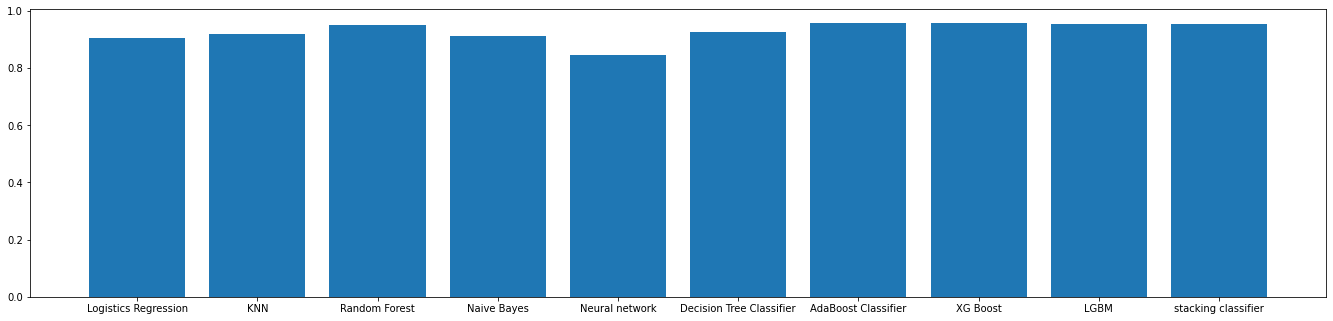

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,3,1])
classifier = ['Logistics Regression',
                       'KNN', 
                       'Random Forest', 
                       'Naive Bayes',
                       'Neural network',
                       'Decision Tree Classifier',
                       'AdaBoost Classifier',
                       'XG Boost',
                       'LGBM',
                       'stacking classifier']

ax.bar(classifier,accuracy)
plt.show()